# Data Visualization
This section the likehood of evrey lable in the dataset

In [38]:
from pathlib import Path
from collections import Counter
import matplotlib.pyplot as plt
from pipeline import load_samples, DEFAULT_CONFIG, DEFAULT_TRAIN_SPLIT

import os

DATASET_DIR = Path('zendod_dataset')
LABEL_KEY = "intent"                   # o 'category', 'label', ecc.
MODEL_PATH = Path("models/text_response_model.joblib")
DATASET_DIR = Path("zendod_dataset")
CONFIG = "massive"
SPLIT = "train"   # o "validation"

os.chdir(r"C:\Users\Gianmarco\Documents\assistente")
print("📂 Directory di lavoro attuale:", os.getcwd())


📂 Directory di lavoro attuale: C:\Users\Gianmarco\Documents\assistente


### Caricamento delle lables

In [39]:
samples = load_samples(DATASET_DIR, config=CONFIG, split=SPLIT)
labels = [s.intent for s in samples]

### Analisi della distribuzione con ploting

📊 Totale esempi: 11514

Distribuzione per label:
calendar_set                     810 ( 7.03%)
play_music                       639 ( 5.55%)
weather_query                    573 ( 4.98%)
calendar_query                   566 ( 4.92%)
general_quirky                   555 ( 4.82%)
qa_factoid                       544 ( 4.72%)
news_query                       503 ( 4.37%)
email_query                      418 ( 3.63%)
email_sendemail                  354 ( 3.07%)
datetime_query                   350 ( 3.04%)
calendar_remove                  312 ( 2.71%)
play_radio                       283 ( 2.46%)
social_post                      283 ( 2.46%)
qa_definition                    267 ( 2.32%)
transport_query                  227 ( 1.97%)
cooking_recipe                   207 ( 1.80%)
lists_query                      198 ( 1.72%)
play_podcasts                    193 ( 1.68%)
recommendation_events            190 ( 1.65%)
alarm_set                        182 ( 1.58%)
lists_createoradd              

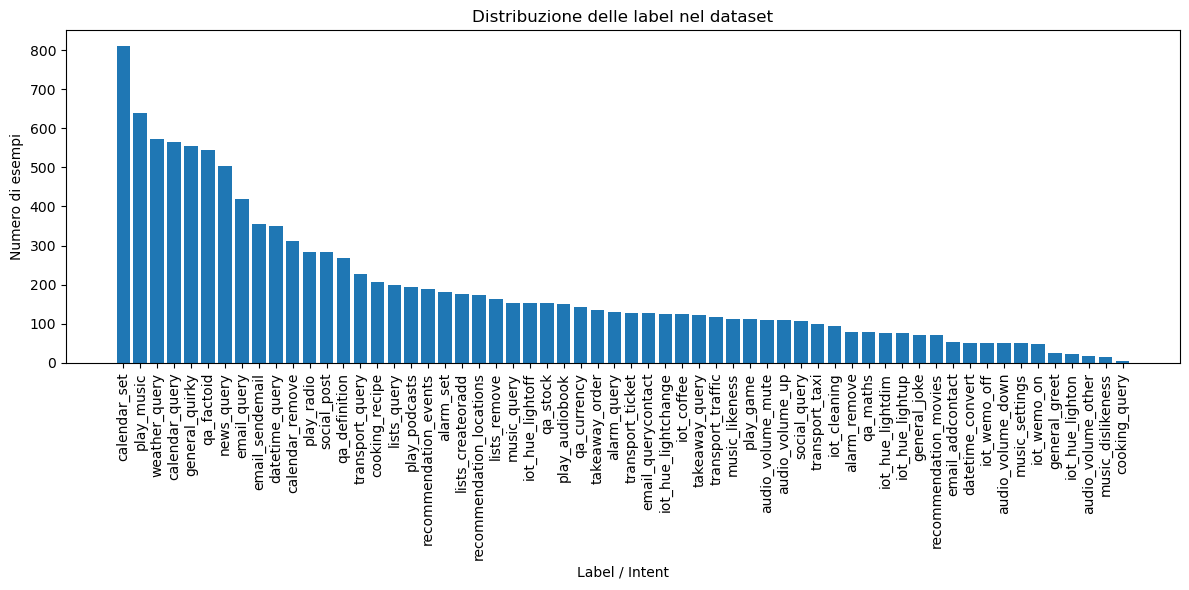

In [40]:
counter = Counter(labels)
total = sum(counter.values())

print(f"📊 Totale esempi: {total}\n")
print("Distribuzione per label:")
for label, count in counter.most_common():
    print(f"{label:30s} {count:5d} ({count/total*100:5.2f}%)")

# --- Grafico ---
labels_sorted = [l for l, _ in counter.most_common()]
counts_sorted = [counter[l] for l in labels_sorted]

plt.figure(figsize=(12, 6))
bars = plt.bar(labels_sorted, counts_sorted)
plt.xticks(rotation=90)
plt.title("Distribuzione delle label nel dataset")
plt.xlabel("Label / Intent")
plt.ylabel("Numero di esempi")
plt.tight_layout()
plt.show()